In [2]:
import tensorflow as tf
from  matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#Functional Api
from tensorflow.keras import Model
from tensorflow.keras.layers import Concatenate,Input

**We would be working MNIST data set present in tf.keras api**

**the dataset contains images which has numbers from 0 to 9 and we need to identify which digit is represented by the image**

In [6]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

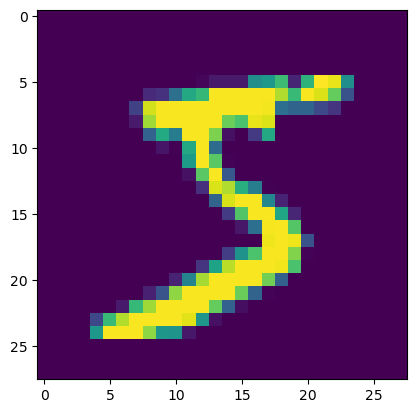

5


In [3]:
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

**we need to reshape our dataset in 1d array**

In [7]:
x_train=x_train.reshape(x_train.shape[0],-1)/255.0
x_test=x_test.reshape(x_test.shape[0],-1)/255.0

In [7]:
x_test.shape

(10000, 784)

In [8]:
#one hot encoding the output by using utilities function in keras
y_train_1=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [9]:
y_train_1[0],y_train[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32), 5)

**Using Sequential Model**

In [3]:
model=Sequential()
#hidden layer 1
model.add(Dense(256,activation='relu',input_shape=(784,)))
#hidden layer 2
model.add(Dense(256,activation='relu'))
#Output Layer
model.add(Dense(10,activation='softmax'))

In [4]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(x_train,y_train_1,epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 2s 8ms/step - loss: 0.4171 - accuracy: 0.8843
Epoch 2/10
118/118 [==============================] - 1s 8ms/step - loss: 0.1518 - accuracy: 0.9566
Epoch 3/10
118/118 [==============================] - 1s 8ms/step - loss: 0.1028 - accuracy: 0.9701
Epoch 4/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0755 - accuracy: 0.9778
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0582 - accuracy: 0.9827
Epoch 6/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0461 - accuracy: 0.9864
Epoch 7/10
118/118 [==============================] - 2s 17ms/step - loss: 0.0359 - accuracy: 0.9894
Epoch 8/10
118/118 [==============================] - 2s 21ms/step - loss: 0.0279 - accuracy: 0.9920
Epoch 9/10
118/118 [==============================] - 2s 21ms/step - loss: 0.0222 - accuracy: 0.9938
Epoch 10/10
118/118 [==============================] - 2s 21ms/step - loss: 0.0167 - accuracy: 0

In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0712 - accuracy: 0.9779


[0.07115918397903442, 0.9779000282287598]

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


**Using Functional Model**

In [14]:
#architecture made in copy
#input Layer
input=Input(shape=[784,])
#hidden Layer-1
hidden_1=Dense(256,activation='relu')(input)
#hidden Layer-2
hidden_2=Dense(256,activation='relu')(hidden_1)
#hidden Layer-3
hidden_3=Dense(256,activation='relu')(input)
#combining the output of hidden_layer-2 and hidden_layer-3
concat=Concatenate()([hidden_2,hidden_3])
output=Dense(10,activation='softmax')(concat)
model=Model(inputs=[input],outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 256)          200960      ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 256)          65792       ['dense_3[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 256)          200960      ['input_1[0][0]']                
                                                                                              

**Creating our own custom layers**

***We need to import tf.keras.layers , there is a parent class Layers in layers api***

In [15]:
#for creating custom layers we need to have subclass from the Layers class

class MyLayer(layers.Layer):
    def __init__(self,units,input_dim,activation):
        #in super we need to pass name of the custom layer and self
        super(MyLayer,self).__init__()
        #now we need to set the weights,biases,activation for this layer
        #we will initialize the weights and biases randomly, 
        # these will be random values which is normally distributed
        w_init=tf.random_normal_initializer()
        self.w=tf.Variable(initial_value=w_init(shape=(input_dim,units),dtype='float32'),trainable=True)
        b_init=tf.random_normal_initializer()
        self.b=tf.Variable(initial_value=b_init(shape=(units,),dtype='float32'),trainable=True)
        self.activation=activation
    def call(self,inputs):
        linear_op=tf.add(tf.matmul(inputs,self.w),self.b)
        #we need to pass the linear_op in activation function
        if(self.activation == 'relu'):
            return tf.nn.relu(linear_op)
        elif(self.activation=='softmax'):
            return tf.nn.softmax(linear_op)    

**Creating the model**

***The model class available in tf.keras it is used to create custom models***

In [16]:
class MyModel(tf.keras.Model):
    #after self we need to pass no of units in i/p layer, no of units in hidden_layer1 and so on
    def __init__(self,n_input,n_hidden1,n_hidden2,n_classes):
        #constructor function of Model class
        super(MyModel,self).__init__()
        #hidden_layer-1
        self.layer1=MyLayer(n_hidden1,n_input,'relu')
        #hidden_layer-2
        self.layer2=MyLayer(n_hidden2,n_hidden1,'relu')
        #output_layer
        self.out_layer=MyLayer(n_classes,n_hidden2,'softmax')

    def call(self,inputs):
        x=self.layer1(inputs)
        x=self.layer2(x)
        return self.out_layer(x)    

**Now we can crate our model by creating object of MyModel class**

In [17]:
model=MyModel(784,256,256,10)

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(x_train,y_train_1,epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 2s 7ms/step - loss: 0.4930 - accuracy: 0.8650
Epoch 2/10
118/118 [==============================] - 1s 8ms/step - loss: 0.1806 - accuracy: 0.9481
Epoch 3/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1263 - accuracy: 0.9628
Epoch 4/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0931 - accuracy: 0.9727
Epoch 5/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0746 - accuracy: 0.9776
Epoch 6/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0577 - accuracy: 0.9836
Epoch 7/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0495 - accuracy: 0.9852
Epoch 8/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0392 - accuracy: 0.9892
Epoch 9/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0332 - accuracy: 0.9902
Epoch 10/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0264 - accuracy: 0

In [20]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0745 - accuracy: 0.9766


[0.07449231296777725, 0.9765999913215637]